# The Effects of Aerobic Excercise On Tear Production

## Introduction

This analysis aims to study the effects of aerobic exercise on the producion of tear. This aims to establish whether aerobic exercises will improve the production of tear in patients with dry eyes.

There are three datasets available for this study, each recording the observed variaions in tear production with respect to the time of exercise:
- DATA FOR NON-ATHLETE BEFORE EXERCISE.xlsx
- DATA FOR NON-ATHLETE DURING EXERCISE.xlsx
- DATA FOR NON-ATHLETE AFTER EXERCISE.xlsx

In [1]:
import numpy as np
import pandas as pd

import pingouin
from scipy.stats import t

import matplotlib.pyplot as plt
import seaborn as sns

## Data Extraction

First of all, let's extract the needed columns from the dataset. From previous assessment of the datasets, I found only the following columns in all the datasets necessary for our analysis:
- NAME
- TEAR VOLUME

The following columns from the `DATA FOR NON-ATHLETE BEFORE EXERCISE.xlsx` may as well be useful for our analysis.
- SEX
- AGE
- WEIGHT
- HEIGHT
- WAIST CIRCUMFERENCE
- BMI

The stated columns from the individual datasets would be extracted into the following pandas `DataFrame`s respectively corresponding to the times the datasets were collected with respect to the time of exercise:
- **`before`**
- **`during`**
- **`after`**

In [2]:
before = pd.read_excel('DATA FOR NON-ATHLETE BEFORE EXERCISE.xlsx',
                       usecols=['NAME','SEX','AGE', 'WEIGHT', 'HEIGHT', 'WAIST CIRCUMFERENCE', 'BMI', 'TEAR VOLUME'])
before.head()

NAME SEX  AGE  WEIGHT  HEIGHT  WAIST CIRCUMFERENCE  \
0       CHUKWUEMEKA STEPAHNIE   F   19    50.0     162                 75.0   
1  IGBOANUGGOUDE UGOCHINYEREM   F   19    65.0     175                 84.0   
2            JOLUGBO VICTORIA   F   19    83.0     171                 95.0   
3             OYETUNDE LUKMAN   M   19    54.0     161                 82.0   
4                AJAI MESHACH   M   20    62.0     175                 89.0   

   TEAR VOLUME   BMI  
0            3  19.1  
1            4  21.2  
2           33  28.4  
3            6  20.8  
4           35  20.2

**This is the data collected before exercise.**

In [3]:
before

NAME SEX  AGE  WEIGHT  HEIGHT  WAIST CIRCUMFERENCE  \
0        CHUKWUEMEKA STEPAHNIE   F   19    50.0     162                 75.0   
1   IGBOANUGGOUDE UGOCHINYEREM   F   19    65.0     175                 84.0   
2             JOLUGBO VICTORIA   F   19    83.0     171                 95.0   
3              OYETUNDE LUKMAN   M   19    54.0     161                 82.0   
4                 AJAI MESHACH   M   20    62.0     175                 89.0   
5        ABDULRASAK HUMKULTHUM   F   21    39.0     163                 30.0   
6               JUWON PRECIOUS   F   20    58.0     171                 32.5   
7          KEHINDE OLUWAPELUMI   F   18    53.0     158                 31.0   
8             GBENRO MOSUNMOLA   F   19    75.0     160                 38.0   
9             INIOLUWA ADENIYI   F   19    58.0     166                 34.0   
10                   OBI EDITH   F   21    52.0     167                 30.0   
11             AJIKOBI MICHAEL   M   21    50.0     165                 30.0   
12              ADEWOYE ESTHER   F   20    45.0     162                 30.0   
13                 OBAGWU JOEL   M   21    69.0     176                 36.0   
14         OWOFESO ABDULKAREEM   M   20    69.0     164                 36.0   
15            BABALOLA RUKAYAT   F   20    72.0     165                 39.0   
16           SULAIMON RASHIDAT   F   20    61.0     170                 33.0   
17    OGUNGBEMI OLUMIDE SAMUEL   M   21    69.0     175                 37.0   
18      ALADE KHADIJAH OLAMIDE   F   22    57.0     155                 36.0   
19            KOLAWOLE ANTHONY   M   18    47.0     165                 32.0   
20     ATOLAGBE PRAISE AYOMIDE   F   20    37.5     153                 28.0   
21                  MOSES JOHN   M   20    64.0     176                 35.0   
22              DANIEL GABRIEL   M   20    58.0     175                 35.0   
23             ODEWANDE SAMUEL   M   22    56.0     178                 34.0   
24        BABAYEMI IBUKUNOLUWA   M   22    59.0     176                 33.0   
25         MUHAMEED ABDULAZEEM   M   18    54.0     170                 35.0   
26                 FUAD SALAMI   M   20    65.0     176                 35.0   
27              OPALUWA SAMSON   M   20    55.0     169                 33.0   

    TEAR VOLUME   BMI  
0             3  19.1  
1             4  21.2  
2            33  28.4  
3             6  20.8  
4            35  20.2  
5             8  14.7  
6            31  19.8  
7            22  21.2  
8            21  29.3  
9            28  21.0  
10           25  18.6  
11           14  18.4  
12           26  17.1  
13           17  22.3  
14            6  25.7  
15           30  26.4  
16           25  21.1  
17           27  22.5  
18           33  23.7  
19           16  17.3  
20            1  16.0  
21           32  20.7  
22           13  18.9  
23           35  17.7  
24           32  19.0  
25           20  18.7  
26           35  21.0  
27            7  19.3

In [4]:
during = pd.read_excel('DATA FOR NON-ATHLETE DURING EXERCISE.xlsx',
                       usecols=['NAME', 'TEAR VOLUME'])
during.head()

NAME  TEAR VOLUME
0       CHUKWUEMEKA STEPAHNIE           12
1  IGBOANUGGOUDE UGOCHINYEREM           28
2            JOLUGBO VICTORIA           22
3             OYETUNDE LUKMAN            6
4                AJAI MESHACH            5

**This is the data collected during exercise.**

In [5]:
during

NAME  TEAR VOLUME
0        CHUKWUEMEKA STEPAHNIE           12
1   IGBOANUGGOUDE UGOCHINYEREM           28
2             JOLUGBO VICTORIA           22
3              OYETUNDE LUKMAN            6
4                 AJAI MESHACH            5
5        ABDULRASAK HUMKULTHUM            2
6               JUWON PRECIOUS           35
7          KEHINDE OLUWAPELUMI           35
8             GBENRO MOSUNMOLA            2
9             INIOLUWA ADENIYI           10
10                   OBI EDITH           17
11             AJIKOBI MICHAEL            2
12              ADEWOYE ESTHER           12
13                 OBAGWU JOEL           10
14         OWOFESO ABDULKAREEM            8
15            BABALOLA RUKAYAT           18
16           SULAIMON RASHIDAT           35
17    OGUNGBEMI OLUMIDE SAMUEL           17
18      ALADE KHADIJAH OLAMIDE           30
19            KOLAWOLE ANTHONY           16
20     ATOLAGBE PRAISE AYOMIDE            0
21                  MOSES JOHN            1
22              DANIEL GABRIEL            6
23             ODEWANDE SAMUEL           35
24        BABAYEMI IBUKUNOLUWA            5
25         MUHAMEED ABDULAZEEM            7
26                 FUAD SALAMI           24
27              OPALUWA SAMSON            7

In [6]:
after = pd.read_excel('DATA FOR NON-ATHLETE AFTER EXERCISE.xlsx',
                      usecols=['NAME', 'TEAR VOLUME'])
after.head()

NAME  TEAR VOLUME
0       CHUKWUEMEKA STEPAHNIE           10
1  IGBOANUGGOUDE UGOCHINYEREM           35
2            JOLUGBO VICTORIA           35
3             OYETUNDE LUKMAN           25
4                AJAI MESHACH           17

**This is the data collected after exercise.**

In [7]:
after

NAME  TEAR VOLUME
0        CHUKWUEMEKA STEPAHNIE           10
1   IGBOANUGGOUDE UGOCHINYEREM           35
2             JOLUGBO VICTORIA           35
3              OYETUNDE LUKMAN           25
4                 AJAI MESHACH           17
5        ABDULRASAK HUMKULTHUM           17
6               JUWON PRECIOUS           35
7          KEHINDE OLUWAPELUMI           16
8             GBENRO MOSUNMOLA           35
9             INIOLUWA ADENIYI           33
10                   OBI EDITH           12
11             AJIKOBI MICHAEL            3
12              ADEWOYE ESTHER           22
13                 OBAGWU JOEL           26
14         OWOFESO ABDULKAREEM           11
15            BABALOLA RUKAYAT           35
16           SULAIMON RASHIDAT           35
17    OGUNGBEMI OLUMIDE SAMUEL           35
18      ALADE KHADIJAH OLAMIDE           35
19            KOLAWOLE ANTHONY           11
20     ATOLAGBE PRAISE AYOMIDE            6
21                  MOSES JOHN           15
22              DANIEL GABRIEL           11
23             ODEWANDE SAMUEL           35
24        BABAYEMI IBUKUNOLUWA           11
25         MUHAMEED ABDULAZEEM           35
26                 FUAD SALAMI           35
27              OPALUWA SAMSON            6

The data would be combined into a single dataframe stored as **`data`** to effectively work with the datasets.

In [8]:
data = before.merge(during, on='NAME', suffixes=('_BEFORE', '_DURING')).merge(after, on='NAME')
data.rename(columns=lambda x: 'tear_volume_after' if x == 'TEAR VOLUME' else x.lower().replace(' ', '_'), inplace=True)
data.head()

name sex  age  weight  height  waist_circumference  \
0       CHUKWUEMEKA STEPAHNIE   F   19    50.0     162                 75.0   
1  IGBOANUGGOUDE UGOCHINYEREM   F   19    65.0     175                 84.0   
2            JOLUGBO VICTORIA   F   19    83.0     171                 95.0   
3             OYETUNDE LUKMAN   M   19    54.0     161                 82.0   
4                AJAI MESHACH   M   20    62.0     175                 89.0   

   tear_volume_before   bmi  tear_volume_during  tear_volume_after  
0                   3  19.1                  12                 10  
1                   4  21.2                  28                 35  
2                  33  28.4                  22                 35  
3                   6  20.8                   6                 25  
4                  35  20.2                   5                 17

In [9]:
data

name sex  age  weight  height  waist_circumference  \
0        CHUKWUEMEKA STEPAHNIE   F   19    50.0     162                 75.0   
1   IGBOANUGGOUDE UGOCHINYEREM   F   19    65.0     175                 84.0   
2             JOLUGBO VICTORIA   F   19    83.0     171                 95.0   
3              OYETUNDE LUKMAN   M   19    54.0     161                 82.0   
4                 AJAI MESHACH   M   20    62.0     175                 89.0   
5        ABDULRASAK HUMKULTHUM   F   21    39.0     163                 30.0   
6               JUWON PRECIOUS   F   20    58.0     171                 32.5   
7          KEHINDE OLUWAPELUMI   F   18    53.0     158                 31.0   
8             GBENRO MOSUNMOLA   F   19    75.0     160                 38.0   
9             INIOLUWA ADENIYI   F   19    58.0     166                 34.0   
10                   OBI EDITH   F   21    52.0     167                 30.0   
11             AJIKOBI MICHAEL   M   21    50.0     165                 30.0   
12              ADEWOYE ESTHER   F   20    45.0     162                 30.0   
13                 OBAGWU JOEL   M   21    69.0     176                 36.0   
14         OWOFESO ABDULKAREEM   M   20    69.0     164                 36.0   
15            BABALOLA RUKAYAT   F   20    72.0     165                 39.0   
16           SULAIMON RASHIDAT   F   20    61.0     170                 33.0   
17    OGUNGBEMI OLUMIDE SAMUEL   M   21    69.0     175                 37.0   
18      ALADE KHADIJAH OLAMIDE   F   22    57.0     155                 36.0   
19            KOLAWOLE ANTHONY   M   18    47.0     165                 32.0   
20     ATOLAGBE PRAISE AYOMIDE   F   20    37.5     153                 28.0   
21                  MOSES JOHN   M   20    64.0     176                 35.0   
22              DANIEL GABRIEL   M   20    58.0     175                 35.0   
23             ODEWANDE SAMUEL   M   22    56.0     178                 34.0   
24        BABAYEMI IBUKUNOLUWA   M   22    59.0     176                 33.0   
25         MUHAMEED ABDULAZEEM   M   18    54.0     170                 35.0   
26                 FUAD SALAMI   M   20    65.0     176                 35.0   
27              OPALUWA SAMSON   M   20    55.0     169                 33.0   

    tear_volume_before   bmi  tear_volume_during  tear_volume_after  
0                    3  19.1                  12                 10  
1                    4  21.2                  28                 35  
2                   33  28.4                  22                 35  
3                    6  20.8                   6                 25  
4                   35  20.2                   5                 17  
5                    8  14.7                   2                 17  
6                   31  19.8                  35                 35  
7                   22  21.2                  35                 16  
8                   21  29.3                   2                 35  
9                   28  21.0                  10                 33  
10                  25  18.6                  17                 12  
11                  14  18.4                   2                  3  
12                  26  17.1                  12                 22  
13                  17  22.3                  10                 26  
14                   6  25.7                   8                 11  
15                  30  26.4                  18                 35  
16                  25  21.1                  35                 35  
17                  27  22.5                  17                 35  
18                  33  23.7                  30                 35  
19                  16  17.3                  16                 11  
20                   1  16.0                   0                  6  
21                  32  20.7                   1                 15  
22                  13  18.9                   6                 11  
23                  35  1

## Gender Distribution

**There's an equal count of both genders in the dataset.**

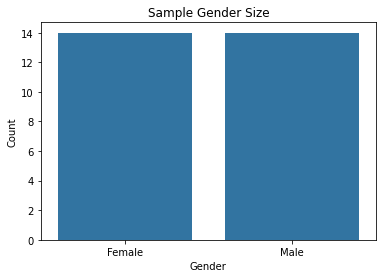

In [10]:
sns.countplot(data=data, x='sex', color=sns.color_palette()[0])
plt.xticks([0, 1], ['Female', 'Male'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Sample Gender Size');

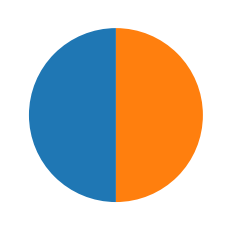

In [11]:
plt.pie(data['sex'].value_counts(), startangle=90);

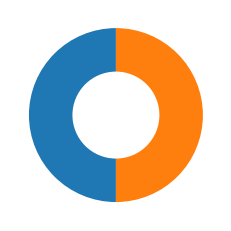

In [12]:
plt.pie(data['sex'].value_counts(), startangle=90, wedgeprops={'width': 0.5});

## Age Distribution

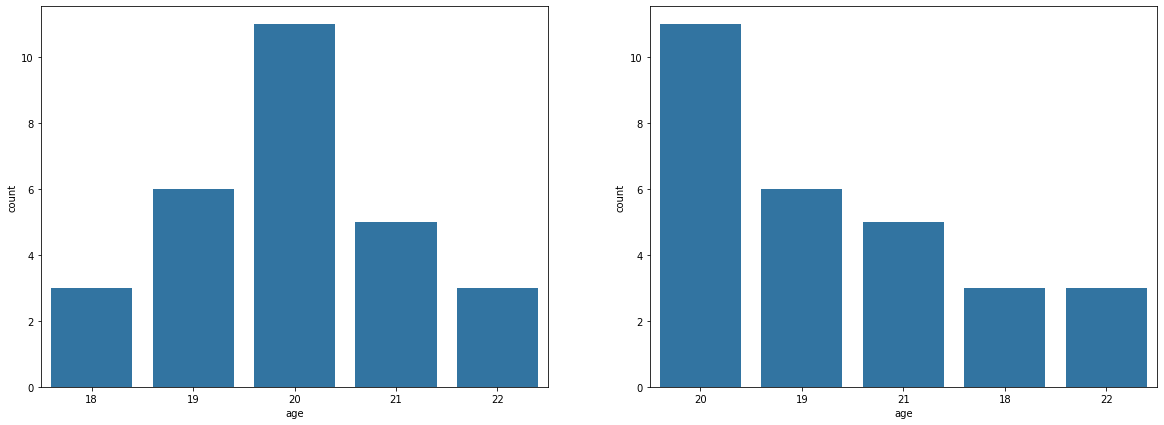

In [13]:
plt.figure(figsize=[20, 7])
plt.subplot(1, 2, 1)
sns.countplot(data=data, x='age', color=sns.color_palette()[0])
plt.subplot(1, 2, 2)
sns.countplot(data=data, x='age', order=data['age'].value_counts().index, color=sns.color_palette()[0]);

## Exploring Tear Volume Production

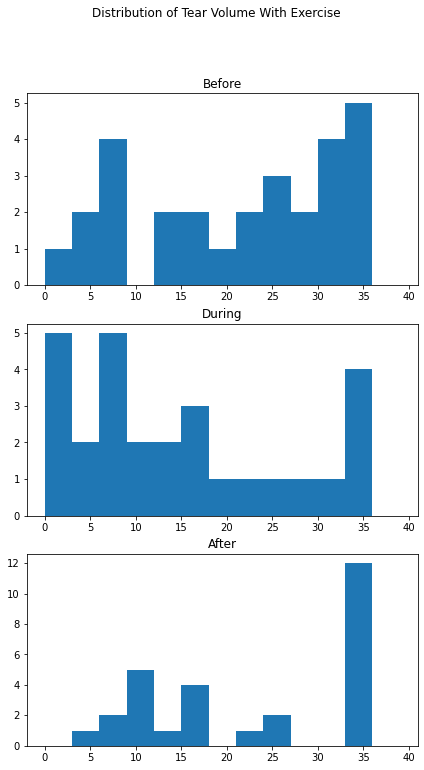

In [14]:
plt.figure(figsize=[7, 12])
plt.subplot(3, 1, 1)
plt.hist(data['tear_volume_before'], bins=np.arange(0, 40, 3))
plt.title('Before')
plt.subplot(3, 1, 2)
plt.hist(data['tear_volume_during'], bins=np.arange(0, 40, 3))
plt.title('During')
plt.subplot(3, 1, 3)
plt.hist(data['tear_volume_after'], bins=np.arange(0, 40, 3));
plt.title('After')
plt.suptitle('Distribution of Tear Volume With Exercise');

The visual shows that there are few dry eye persons in the dataset. That is, their tear production volume is between $0$ and $10$ $mg^3$.

Majority of the people in this dataset have a tear production volume greater than $10 mg^3$.

To see the categories of persons in this dataset based on their tear producton volume, the tear production volume before exercise would be split into two groups:
- The dry eye type (tear volume before exercise less than or equal to $10mg^3$)
- The normal eye type (tear production volume greater than $10mg^3$)

This category would be indicated in the **`eye_type`** column of the **`data`** `DataFrame`.

In [15]:
data['eye_type'] = pd.cut(data['tear_volume_before'], bins=[0, 10, 40], labels=['dry', 'normal'], ordered=False)
data.head()

name sex  age  weight  height  waist_circumference  \
0       CHUKWUEMEKA STEPAHNIE   F   19    50.0     162                 75.0   
1  IGBOANUGGOUDE UGOCHINYEREM   F   19    65.0     175                 84.0   
2            JOLUGBO VICTORIA   F   19    83.0     171                 95.0   
3             OYETUNDE LUKMAN   M   19    54.0     161                 82.0   
4                AJAI MESHACH   M   20    62.0     175                 89.0   

   tear_volume_before   bmi  tear_volume_during  tear_volume_after eye_type  
0                   3  19.1                  12                 10      dry  
1                   4  21.2                  28                 35      dry  
2                  33  28.4                  22                 35   normal  
3                   6  20.8                   6                 25      dry  
4                  35  20.2                   5                 17   normal

In [16]:
data

name sex  age  weight  height  waist_circumference  \
0        CHUKWUEMEKA STEPAHNIE   F   19    50.0     162                 75.0   
1   IGBOANUGGOUDE UGOCHINYEREM   F   19    65.0     175                 84.0   
2             JOLUGBO VICTORIA   F   19    83.0     171                 95.0   
3              OYETUNDE LUKMAN   M   19    54.0     161                 82.0   
4                 AJAI MESHACH   M   20    62.0     175                 89.0   
5        ABDULRASAK HUMKULTHUM   F   21    39.0     163                 30.0   
6               JUWON PRECIOUS   F   20    58.0     171                 32.5   
7          KEHINDE OLUWAPELUMI   F   18    53.0     158                 31.0   
8             GBENRO MOSUNMOLA   F   19    75.0     160                 38.0   
9             INIOLUWA ADENIYI   F   19    58.0     166                 34.0   
10                   OBI EDITH   F   21    52.0     167                 30.0   
11             AJIKOBI MICHAEL   M   21    50.0     165                 30.0   
12              ADEWOYE ESTHER   F   20    45.0     162                 30.0   
13                 OBAGWU JOEL   M   21    69.0     176                 36.0   
14         OWOFESO ABDULKAREEM   M   20    69.0     164                 36.0   
15            BABALOLA RUKAYAT   F   20    72.0     165                 39.0   
16           SULAIMON RASHIDAT   F   20    61.0     170                 33.0   
17    OGUNGBEMI OLUMIDE SAMUEL   M   21    69.0     175                 37.0   
18      ALADE KHADIJAH OLAMIDE   F   22    57.0     155                 36.0   
19            KOLAWOLE ANTHONY   M   18    47.0     165                 32.0   
20     ATOLAGBE PRAISE AYOMIDE   F   20    37.5     153                 28.0   
21                  MOSES JOHN   M   20    64.0     176                 35.0   
22              DANIEL GABRIEL   M   20    58.0     175                 35.0   
23             ODEWANDE SAMUEL   M   22    56.0     178                 34.0   
24        BABAYEMI IBUKUNOLUWA   M   22    59.0     176                 33.0   
25         MUHAMEED ABDULAZEEM   M   18    54.0     170                 35.0   
26                 FUAD SALAMI   M   20    65.0     176                 35.0   
27              OPALUWA SAMSON   M   20    55.0     169                 33.0   

    tear_volume_before   bmi  tear_volume_during  tear_volume_after eye_type  
0                    3  19.1                  12                 10      dry  
1                    4  21.2                  28                 35      dry  
2                   33  28.4                  22                 35   normal  
3                    6  20.8                   6                 25      dry  
4                   35  20.2                   5                 17   normal  
5                    8  14.7                   2                 17      dry  
6                   31  19.8                  35                 35   normal  
7                   22  21.2                  35                 16   normal  
8                   21  29.3                   2                 35   normal  
9                   28  21.0                  10                 33   normal  
10                  25  18.6                  17                 12   normal  
11                  14  18.4                   2                  3   normal  
12                  26  17.1                  12                 22   normal  
13                  17  22.3                  10                 26   normal  
14                   6  25.7                   8                 11      dry  
15                  30  26.4                  18                 35   normal  
16                  25  21.1                  35                 35   normal  
17                  27  22.5                  17                 35   normal  
18                  33  23.7                  30                 35   normal  
19                  16  17.3                  16                 11   normal  
20                   1  16.0                  

**There are just a quarter persons (7) with *dry eye* type in this dataset.**

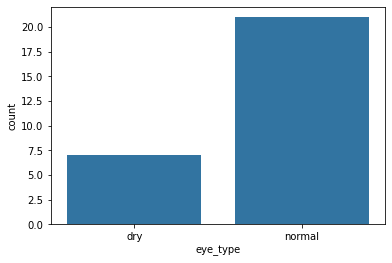

In [17]:
sns.countplot(data=data, x='eye_type', color=sns.color_palette()[0]);

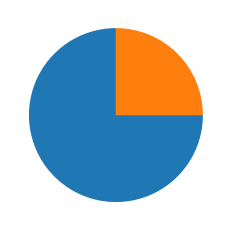

In [18]:
plt.pie(data['eye_type'].value_counts(), startangle=90);

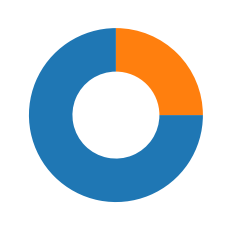

In [19]:
plt.pie(data['eye_type'].value_counts(), startangle=90, wedgeprops={'width': 0.5});

### Analysing The Effects of Aerobic Exercise On Tear Volume Production

In [20]:
tear_data = pd.melt(data, id_vars=['name', 'eye_type'],
        value_vars=['tear_volume_before', 'tear_volume_during', 'tear_volume_after'],
        var_name='exercise_time', value_name='tear_volume').replace(r'tear_volume_', '', regex=True).loc[:, 'eye_type': 'tear_volume']
        
tear_data['exercise_time'] = tear_data['exercise_time'].str.title()
tear_data

eye_type exercise_time  tear_volume
0       dry        Before            3
1       dry        Before            4
2    normal        Before           33
3       dry        Before            6
4    normal        Before           35
..      ...           ...          ...
79   normal         After           35
80   normal         After           11
81   normal         After           35
82   normal         After           35
83      dry         After            6

[84 rows x 3 columns]

**As observed from the visualization below, there is generally an improvement in tear production volume for persons with dry eyes upon exercise and after exercise as suggested by the dataset.**

**There also seem to be a decline in tear production volume for persons with normal eyes upon exercise followed by an improvement in tear production volume after exercise.**

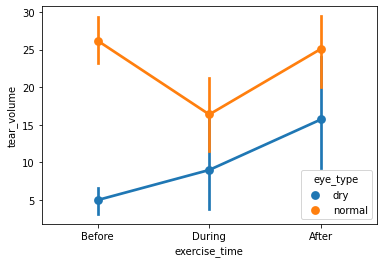

In [21]:
sns.pointplot(data=tear_data, x='exercise_time', y='tear_volume', hue='eye_type');

To explore the difference in tear production volume with respect to time of exercise (before, during, or after), we would add two columns indicating the difference during and after exercise.

In [22]:
data['vol_diff_during'] = data['tear_volume_during'] - data['tear_volume_before']
data['vol_diff_after'] = data['tear_volume_after'] - data['tear_volume_before']
data.head()

name sex  age  weight  height  waist_circumference  \
0       CHUKWUEMEKA STEPAHNIE   F   19    50.0     162                 75.0   
1  IGBOANUGGOUDE UGOCHINYEREM   F   19    65.0     175                 84.0   
2            JOLUGBO VICTORIA   F   19    83.0     171                 95.0   
3             OYETUNDE LUKMAN   M   19    54.0     161                 82.0   
4                AJAI MESHACH   M   20    62.0     175                 89.0   

   tear_volume_before   bmi  tear_volume_during  tear_volume_after eye_type  \
0                   3  19.1                  12                 10      dry   
1                   4  21.2                  28                 35      dry   
2                  33  28.4                  22                 35   normal   
3                   6  20.8                   6                 25      dry   
4                  35  20.2                   5                 17   normal   

   vol_diff_during  vol_diff_after  
0                9               7  
1               24              31  
2              -11               2  
3                0              19  
4              -30             -18

In [23]:
data

name sex  age  weight  height  waist_circumference  \
0        CHUKWUEMEKA STEPAHNIE   F   19    50.0     162                 75.0   
1   IGBOANUGGOUDE UGOCHINYEREM   F   19    65.0     175                 84.0   
2             JOLUGBO VICTORIA   F   19    83.0     171                 95.0   
3              OYETUNDE LUKMAN   M   19    54.0     161                 82.0   
4                 AJAI MESHACH   M   20    62.0     175                 89.0   
5        ABDULRASAK HUMKULTHUM   F   21    39.0     163                 30.0   
6               JUWON PRECIOUS   F   20    58.0     171                 32.5   
7          KEHINDE OLUWAPELUMI   F   18    53.0     158                 31.0   
8             GBENRO MOSUNMOLA   F   19    75.0     160                 38.0   
9             INIOLUWA ADENIYI   F   19    58.0     166                 34.0   
10                   OBI EDITH   F   21    52.0     167                 30.0   
11             AJIKOBI MICHAEL   M   21    50.0     165                 30.0   
12              ADEWOYE ESTHER   F   20    45.0     162                 30.0   
13                 OBAGWU JOEL   M   21    69.0     176                 36.0   
14         OWOFESO ABDULKAREEM   M   20    69.0     164                 36.0   
15            BABALOLA RUKAYAT   F   20    72.0     165                 39.0   
16           SULAIMON RASHIDAT   F   20    61.0     170                 33.0   
17    OGUNGBEMI OLUMIDE SAMUEL   M   21    69.0     175                 37.0   
18      ALADE KHADIJAH OLAMIDE   F   22    57.0     155                 36.0   
19            KOLAWOLE ANTHONY   M   18    47.0     165                 32.0   
20     ATOLAGBE PRAISE AYOMIDE   F   20    37.5     153                 28.0   
21                  MOSES JOHN   M   20    64.0     176                 35.0   
22              DANIEL GABRIEL   M   20    58.0     175                 35.0   
23             ODEWANDE SAMUEL   M   22    56.0     178                 34.0   
24        BABAYEMI IBUKUNOLUWA   M   22    59.0     176                 33.0   
25         MUHAMEED ABDULAZEEM   M   18    54.0     170                 35.0   
26                 FUAD SALAMI   M   20    65.0     176                 35.0   
27              OPALUWA SAMSON   M   20    55.0     169                 33.0   

    tear_volume_before   bmi  tear_volume_during  tear_volume_after eye_type  \
0                    3  19.1                  12                 10      dry   
1                    4  21.2                  28                 35      dry   
2                   33  28.4                  22                 35   normal   
3                    6  20.8                   6                 25      dry   
4                   35  20.2                   5                 17   normal   
5                    8  14.7                   2                 17      dry   
6                   31  19.8                  35                 35   normal   
7                   22  21.2                  35                 16   normal   
8                   21  29.3                   2                 35   normal   
9                   28  21.0                  10                 33   normal   
10                  25  18.6                  17                 12   normal   
11                  14  18.4                   2                  3   normal   
12                  26  17.1                  12                 22   normal   
13                  17  22.3                  10                 26   normal   
14                   6  25.7                   8                 11      dry   
15                  30  26.4                  18                 35   normal   
16                  25  21.1                  35                 35   normal   
17                  27  22.5                  17                 35   normal   
18                  33  23.7                  30                 35   normal   
19                  16  17.3                  16                 11   normal   
20                   1  1

The change in tear production for persons with dry eyes is of more interest in this analysis. Therefore, further analysis would be performed on the subset of the data for persons with dry eyes.

In [24]:
dry_eye_data = data.loc[data['eye_type'] == 'dry'].reset_index(drop=True)
dry_eye_data

name sex  age  weight  height  waist_circumference  \
0       CHUKWUEMEKA STEPAHNIE   F   19    50.0     162                 75.0   
1  IGBOANUGGOUDE UGOCHINYEREM   F   19    65.0     175                 84.0   
2             OYETUNDE LUKMAN   M   19    54.0     161                 82.0   
3       ABDULRASAK HUMKULTHUM   F   21    39.0     163                 30.0   
4         OWOFESO ABDULKAREEM   M   20    69.0     164                 36.0   
5     ATOLAGBE PRAISE AYOMIDE   F   20    37.5     153                 28.0   
6              OPALUWA SAMSON   M   20    55.0     169                 33.0   

   tear_volume_before   bmi  tear_volume_during  tear_volume_after eye_type  \
0                   3  19.1                  12                 10      dry   
1                   4  21.2                  28                 35      dry   
2                   6  20.8                   6                 25      dry   
3                   8  14.7                   2                 17      dry   
4                   6  25.7                   8                 11      dry   
5                   1  16.0                   0                  6      dry   
6                   7  19.3                   7                  6      dry   

   vol_diff_during  vol_diff_after  
0                9               7  
1               24              31  
2                0              19  
3               -6               9  
4                2               5  
5               -1               5  
6                0              -1

**The average improvement of tear volume production of dry eye persons after exercise as compared with before exercise is:**

In [25]:
dry_eye_data['vol_diff_after'].mean()

10.714285714285714

In [26]:
np.random.seed(10)

bootstrap_dist = []

for _ in range(10000):
    df_sample = dry_eye_data.sample(frac=1, replace=True)
    sample_mean = df_sample['vol_diff_after'].mean()
    bootstrap_dist.append(sample_mean)

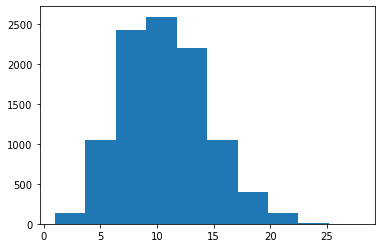

In [27]:
plt.hist(bootstrap_dist);

**The simulated bootstrap suggest the populaton has an average difference in tear volume after exercise of:**

In [28]:
boot_mean = np.mean(bootstrap_dist)
boot_mean

10.746400000000001

**We are 95% confident that the average difference of tear production volume after exercise lies between the following values:**

In [29]:
np.quantile(bootstrap_dist, 0.025), np.quantile(bootstrap_dist, 0.975)

(4.142857142857143, 18.714285714285715)

In [30]:
std_err = np.std(bootstrap_dist, ddof=1)
std_err

3.7747693117470265

In [31]:
pop_std = std_err * np.sqrt(len(dry_eye_data))
pop_std

9.987100855521078

**The null hypothesis states that aerobic exercise has no effect on tear production. That is, the average difference in tear production is 0.**

**The alternative hypothesis states otherwise, that aerobic exercise improves tear production for persons with dry eye. That is, the average difference in tear production is greater than 0.**
$$H_0: \mu_{diff} = \mu_{after} - \mu_{before} = 0$$
$$H_{alt}: \mu_{diff} = \mu_{after} - \mu_{before} > 0$$

A significance level of $\alpha = 0.05$ is set. 

Since we are comparing the same population against itself, a **paired T-test** would be used to see the significance if the effect of aerobic exercise on tear production for persons with dry eyes.

The test-statistic *t*, for a paired t-test is calaculated using the following formula:
$$t = \frac{\mu_{after} - \mu_{before}}{standard\ error} = \frac{\mu_{diff}}{standard\ error}$$

Where:
> $\mu_{diff}$ = difference in tear volume before and after exercise from the sample.

> standard error is given by:
$$SE \approx \sqrt{\frac{s_{diff}^2}{n_{diff}}}$$

Where $s_{diff}$ is the standard deviation of the difference in tear production from the sample and $n_{diff}$ is the number of observations in the sample

**The calculated test statistic _t_ is**

In [32]:
diff_mean = dry_eye_data['vol_diff_after'].mean()
diff_std = dry_eye_data['vol_diff_after'].std()
diff_n = len(dry_eye_data)
t_stat = diff_mean/np.sqrt((diff_std**2)/diff_n)
t_stat

2.6255251575525183

This gives a *p-value* of:

In [33]:
p_value = 1 - t.cdf(t_stat, df=diff_n - 1)
p_value

0.01964716970293423

The _p-value_ can easily be obtained using the pingouin package:

In [34]:
pingouin.ttest(x=dry_eye_data['vol_diff_after'],
               y=0,
               alternative='greater')

T  dof alternative     p-val        CI95%   cohen-d   BF10  \
T-test  2.625525    6     greater  0.019647  [2.78, inf]  0.992355  4.746   

           power  
T-test  0.748825

In [35]:
pingouin.ttest(x=dry_eye_data['tear_volume_after'],
               y=dry_eye_data['tear_volume_before'],
               paired=True,
               alternative='greater')

T  dof alternative     p-val        CI95%   cohen-d   BF10  \
T-test  2.625525    6     greater  0.019647  [2.78, inf]  1.364915  4.746   

           power  
T-test  0.936247

## Conclusion

**From all the methods, the same p-value of 0.01964 which is less than the significance level $(\alpha = 0.05)$ was obtained.**

**Therefore, from the result of the analysis, we _REJECT_ the null hypothesis which states that aerobic exercise has no effect on tear production.**